In [5]:
import os
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [6]:
labels = ["Runtime fetchImages", "Runtime recognizeFaces","Runtime cropSortFaces","Runtime createCollage"]

In [7]:
def add_delimiters(fpath, delimiter=','):

    s_data = ''
    max_num_delimiters = 0

    with open(fpath, 'r') as f:
        for line in f:
            s_data += line
            delimiter_count = line.count(delimiter)
            if delimiter_count > max_num_delimiters:
                max_num_delimiters = delimiter_count

    s_delimiters = delimiter * max_num_delimiters + '\n'

    return io.StringIO(s_delimiters + s_data)

## Extract data 

In [265]:
csvs = os.listdir("csvs")

In [266]:
data = pd.DataFrame()
data.index = ["RuntimeFetch","RuntimeRecognize","RuntimeCropSort","RuntimeCollage"]
for csv in csvs:
    tmp =  pd.read_csv(add_delimiters(f"csvs/{csv}"),header=None)[1:]
    tmp.index = ["RuntimeFetch","RuntimeRecognize","RuntimeCropSort","RuntimeCollage"]
    data = pd.concat([data, tmp], axis = 1)

In [267]:
data.to_csv("OG128.csv", sep=",")

## Final Visualisation

In [26]:
def norm(mns, sns, maxs):
    n_mns, n_sns = [],[]
    for i,val in enumerate(maxs):
        n_mns.append(mns[i]/val)
        n_sns.append(sns[i]/val)
    return n_mns, n_sns

In [27]:
prices=[
    PPMS_NV128 := 0.0000000021,
    PPMS_NV512 := 0.0000000083,
    PPMS_OG128 := 0.0000000021
]

In [28]:
fin_csvs = [file for file in os.listdir() if ".csv" in file]

[0.0004935393884140893, 0.027197631543480594, 0.05479821343504251, 0.04191671019348479]


Text(0.5, 1.0, 'Inefficiency of Configuration regarding Time/Price')

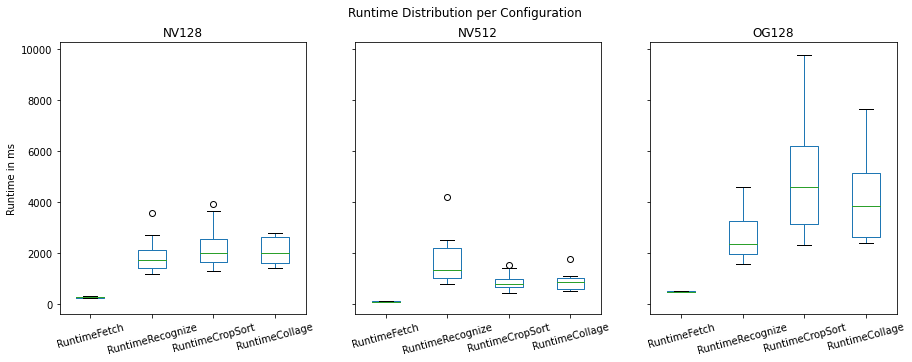

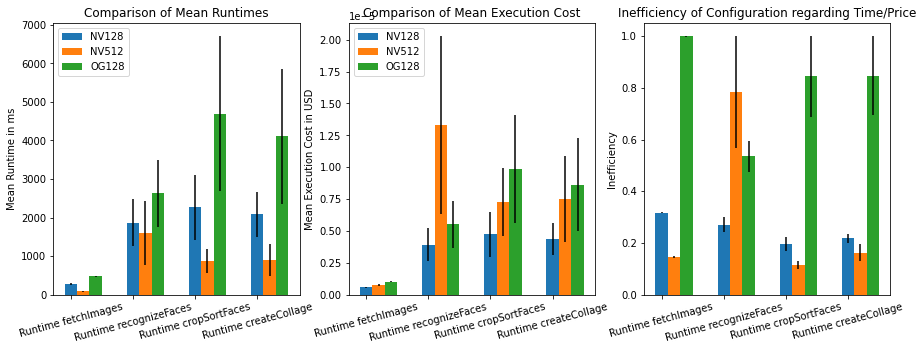

In [30]:
fig, ax = plt.subplots(1,3,figsize=(15,5),sharey=True)
fig2, ax2 = plt.subplots(1,3,figsize=(15,5))

X_axis = np.arange(len(labels))

mns, sns = [],[]
maxs = []
for i,csv in enumerate(fin_csvs):
    tmp = pd.read_csv(csv, header=None)[1:].set_index(0)
    tmp.T.boxplot(ax = ax[i],rot=15,grid=False)
    name = csv.split(".")[0]
    
    mean = tmp.mean(axis = 1).tolist()
    mean_price = [x*prices[i] for x in mean]
    
    std = tmp.std(axis=1)
    std_price= [x*prices[i] for x in std]
    
    mn = [x*y for x,y in zip(mean,mean_price)]
    sn = [x*y for x,y in zip(std, std_price)]
    maxs.append([x+y for x,y in zip(mn,sn)])
    mns.append(mn)
    sns.append(sn)
    
    
    ax[i].set_title(name)
    
    ax2[0].bar(X_axis+0.2*i-1,mean ,0.2, yerr = std, label=name)
    ax2[1].bar(X_axis+0.2*i-1,mean_price,0.2,yerr = std_price,label=name)


    
maxs = [max([x[i] for x in maxs]) for i in range(len(labels))]
print(maxs)
for i in range(len(fin_csvs)):
    norm_val, norm_std = norm(mns[i],sns[i],maxs)
    ax2[2].bar(X_axis+0.2*i-1,norm_val,0.2,yerr = norm_std,label=name)

    
    
ax[0].set_ylabel("Runtime in ms")
    
ax2[0].legend(loc="upper left")
ax2[0].set_ylabel("Mean Runtime in ms")
ax2[0].set_xticks(X_axis - 1, labels,rotation=15)

ax2[1].legend(loc="upper left")
ax2[1].set_ylabel("Mean Execution Cost in USD")
ax2[1].set_xticks(X_axis - 1, labels,rotation=15)

ax2[2].set_ylabel("Inefficiency")
ax2[2].set_xticks(X_axis - 1, labels,rotation=15)

fig.suptitle("Runtime Distribution per Configuration")
ax2[0].set_title("Comparison of Mean Runtimes")
ax2[1].set_title("Comparison of Mean Execution Cost")
ax2[2].set_title("Inefficiency of Configuration regarding Time/Price")